In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

In [3]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)

    for espisode in range(num_episodes):
        observation = env.reset()
        observation_list = list()
        reward_list = list()

        # Generate an episode following ⇡: S0, A0, R1, S1, A1, R2, . . . , ST-1, AT-1, RT
        for t in range(100):
            action = policy(observation)
            observation, reward, done, _ = env.step(action)

            observation_list.append(observation)
            reward_list.append(reward)

            if done:
                break
        G = 0
        for i in range(len(observation_list) -2, -1, -1):
            # G = ∂G + Rt+1
            G = discount_factor * G + reward_list[i + 1]
            # Unless St appears in S0,S1,...,St 1:
            # Append G to Returns(St)
            if observation_list[i] not in observation_list[:i]:
                returns_sum[observation_list[i]] += G
                returns_count[observation_list[i]] += 1

    # V (St) average(Returns(St))
    for count in returns_count.keys():
        V[count] = returns_sum[count] / returns_count[count]

    return V    

In [4]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

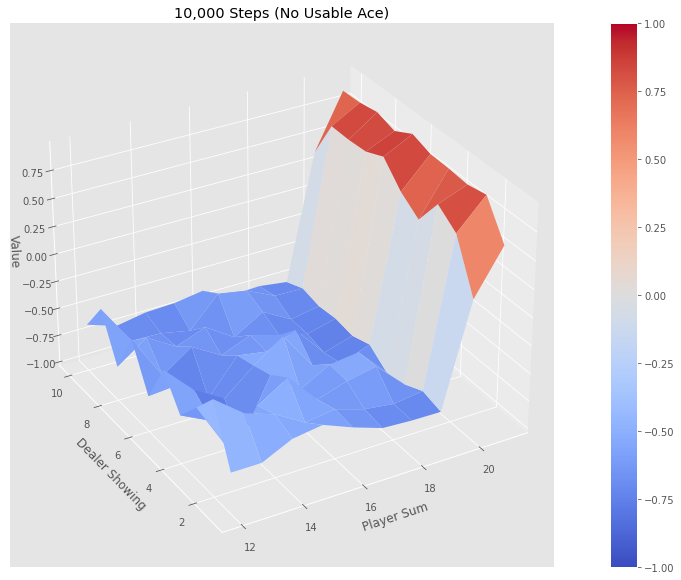

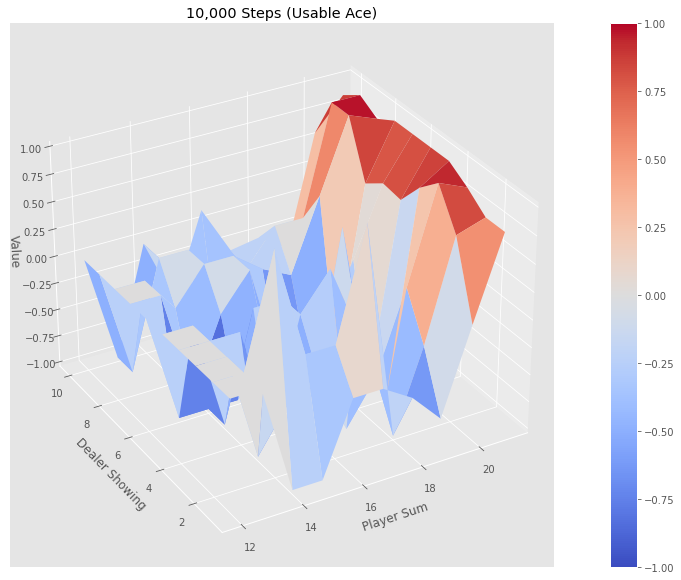

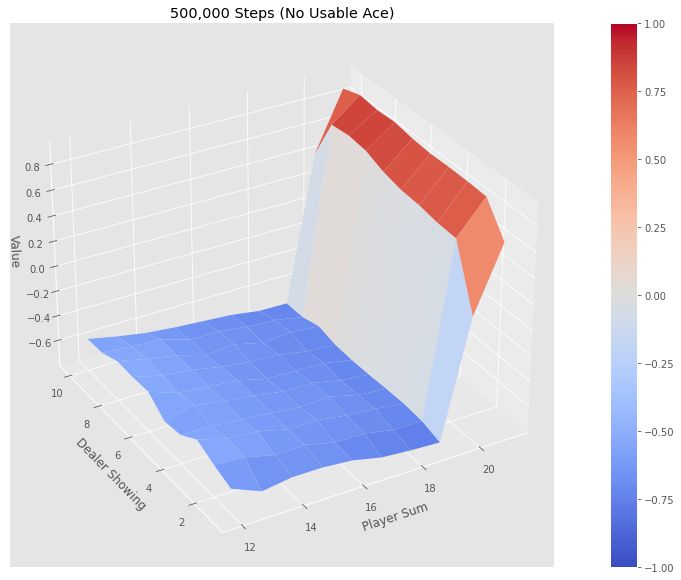

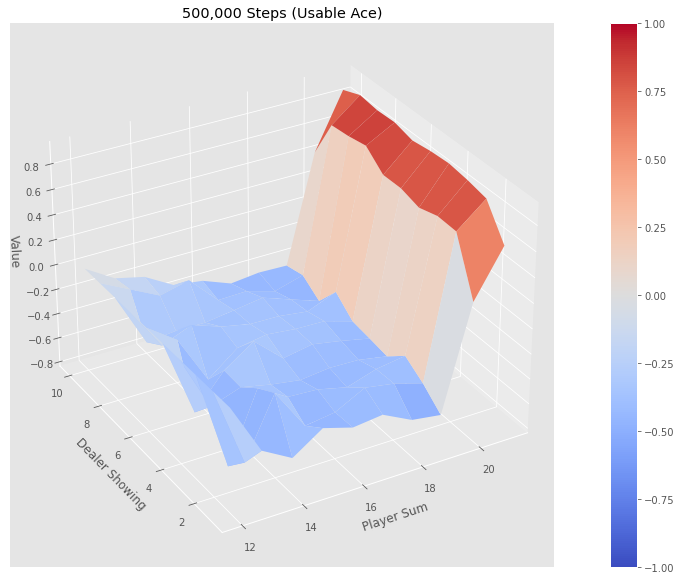

In [6]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")